# The Sparks Foundation

# Data Science and Business Analytics

Exploratory Data Analysis- Retail

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can
work to make more profit.

● What all business problems you can derive by exploring the data?

Author- Shubham Kumar

In [4]:
rm(list=ls())
library(ggplot2)
library(tidyverse)

# DATA VISUALIZATION

In [7]:
SampleSuperstore <- read.csv("C:/Users/User/Downloads/SampleSuperstore.csv")


In [9]:
mydata=SampleSuperstore
attach(mydata)
str(mydata)

'data.frame':	9994 obs. of  13 variables:
 $ Ship.Mode   : Factor w/ 4 levels "First Class",..: 3 3 3 4 4 4 4 4 4 4 ...
 $ Segment     : Factor w/ 3 levels "Consumer","Corporate",..: 1 1 2 1 1 1 1 1 1 1 ...
 $ Country     : Factor w/ 1 level "United States": 1 1 1 1 1 1 1 1 1 1 ...
 $ City        : Factor w/ 531 levels "Aberdeen","Abilene",..: 195 195 267 154 154 267 267 267 267 267 ...
 $ State       : Factor w/ 49 levels "Alabama","Arizona",..: 16 16 4 9 9 4 4 4 4 4 ...
 $ Postal.Code : int  42420 42420 90036 33311 33311 90032 90032 90032 90032 90032 ...
 $ Region      : Factor w/ 4 levels "Central","East",..: 3 3 4 3 3 4 4 4 4 4 ...
 $ Category    : Factor w/ 3 levels "Furniture","Office Supplies",..: 1 1 2 1 2 1 2 3 2 2 ...
 $ Sub.Category: Factor w/ 17 levels "Accessories",..: 5 6 11 17 15 10 3 14 4 2 ...
 $ Sales       : num  262 731.9 14.6 957.6 22.4 ...
 $ Quantity    : int  2 3 2 5 2 7 4 6 3 5 ...
 $ Discount    : num  0 0 0 0.45 0.2 0 0 0.2 0.2 0 ...
 $ Profit      : num  41.

# Descriptive Statistics

In [10]:
summary(mydata)

          Ship.Mode           Segment              Country    
 First Class   :1538   Consumer   :5191   United States:9994  
 Same Day      : 543   Corporate  :3020                       
 Second Class  :1945   Home Office:1783                       
 Standard Class:5968                                          
                                                              
                                                              
                                                              
            City               State       Postal.Code        Region    
 New York City: 915   California  :2001   Min.   : 1040   Central:2323  
 Los Angeles  : 747   New York    :1128   1st Qu.:23223   East   :2848  
 Philadelphia : 537   Texas       : 985   Median :56431   South  :1620  
 San Francisco: 510   Pennsylvania: 587   Mean   :55190   West   :3203  
 Seattle      : 428   Washington  : 506   3rd Qu.:90008                 
 Houston      : 377   Illinois    : 492   Max.   :99301   

# data preparing and cleaning

In [11]:
#any null values?
is.null(mydata)

[1] FALSE

In [14]:
#any duplicacy?
mydatanew <- mydata %>% distinct()

In [15]:
##yes, duplicates were removed
#We see that there is an outlier in the Sales feature, an unusual hike. 
#Let’s replace it with the mean of sales.

In [17]:
maxSales <- max(mydatanew$Sales)
mydatanew$Sales <- replace(mydatanew$Sales, mydatanew$Sales==maxSales,mean(mydatanew$Sales))

In [18]:
#Removing country and Postal Codes feature
mydatanew <- mydatanew %>% select(-c(Country, Postal.Code))

# Visualization
# Let’s analyze patterns in our cleaned data

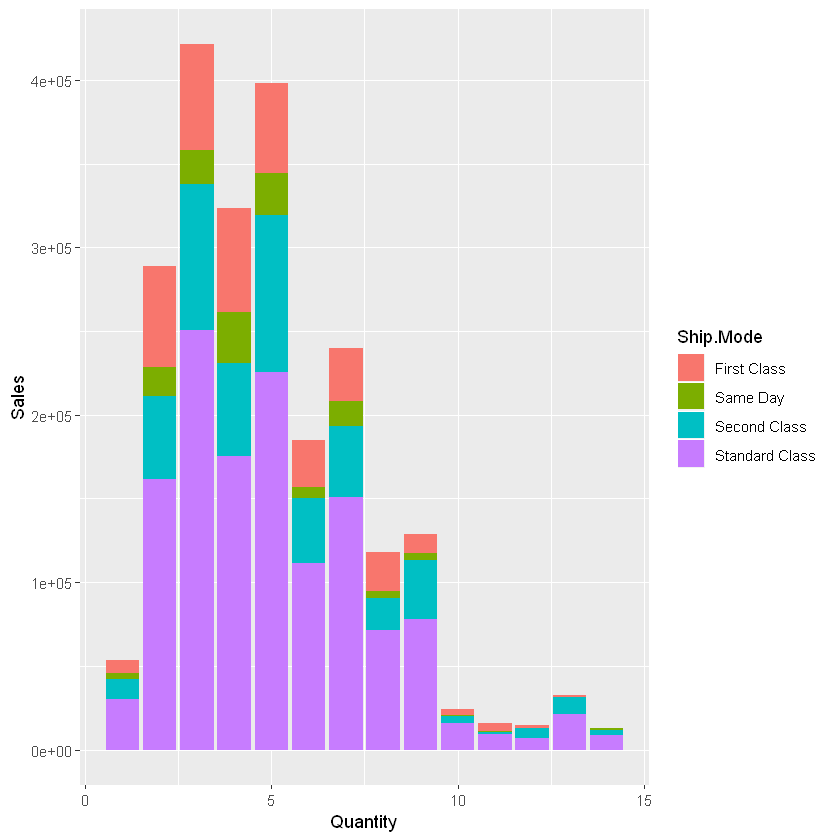

In [19]:
#Sales vs Quantity

ggplot(data = mydatanew, aes(x = Quantity, y = Sales, fill = Ship.Mode) )+ geom_bar(stat = "identity")

In the above graph, we see the following pattern that most of the sales have been triggered by the standard class of shipment mode.

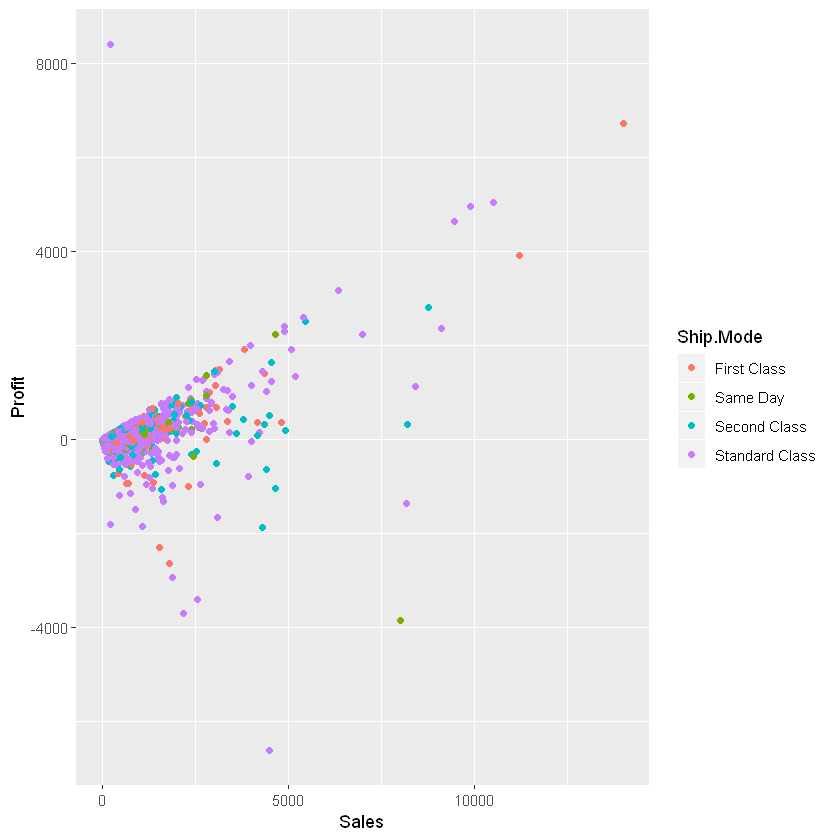

In [20]:
#Sales vs Profit

ggplot(data = mydatanew, aes(x = Sales, y = Profit, color = Ship.Mode)) + geom_point()


And hence, obviously we see more profits/loss have been availed from the standard shipment class. But, there are not higher range profits seen this feature.


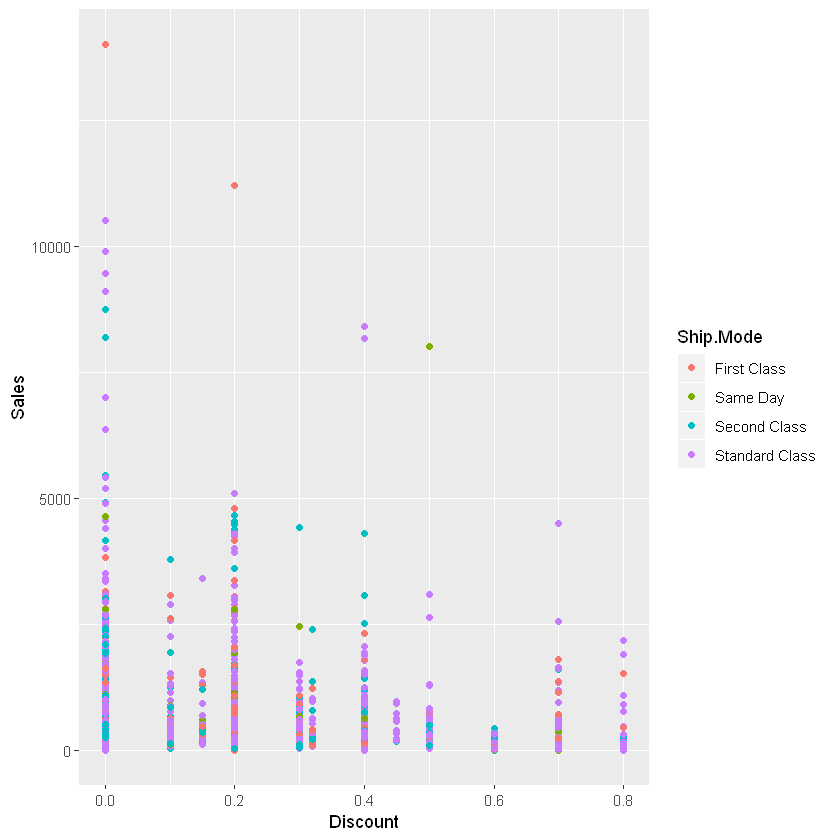

In [21]:
#Sales vs Discount
#Let us see how Sales are affected if discounts are offered

ggplot() + geom_point(data = mydatanew, aes(x = Discount, y = Sales, color = Ship.Mode)) 

It is evident that the above graph that discounts attract more sales. But, discounts attract mostly the Standard Class shipment. Same day shipment mode receive the least disount offers.

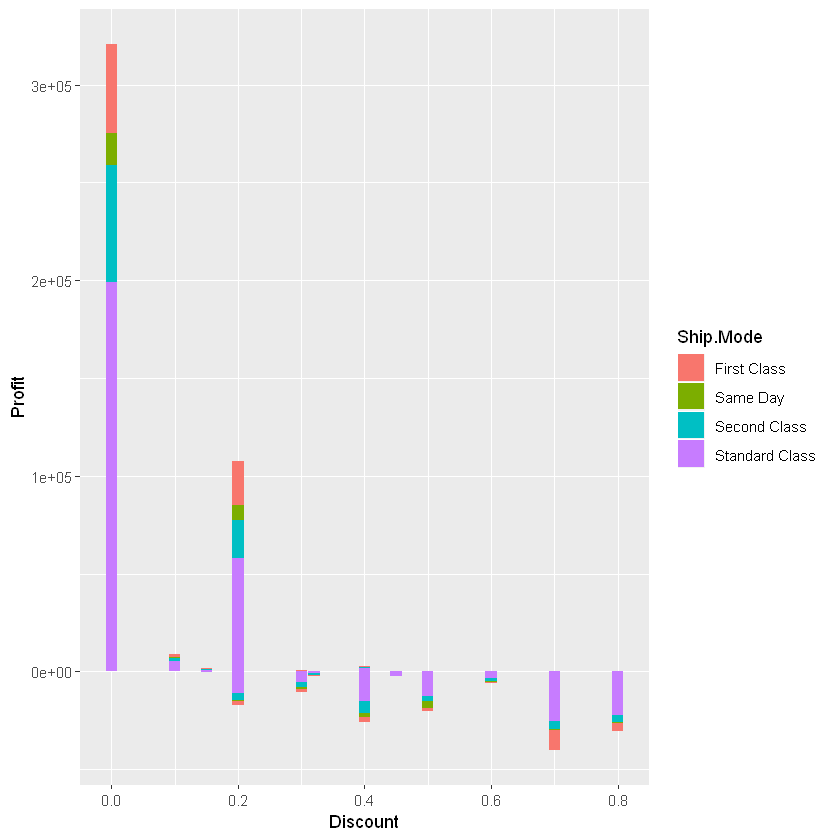

In [22]:
#Profits vs Discount
#Let’s see whether profits have been triggered if discounts have been redeemed

ggplot() + geom_bar(data =mydatanew, aes(x = Discount, y = Profit, fill = Ship.Mode), stat = "identity") 


Yes, we see clearly, the more discounts have been offered and redeemed, the lesser profits the segments have achieved.
Products with no discounts show high range of profits but as the discount range increases, we only see more and more loss with hardly any profit.


ERROR: Error: Cannot use `+.gg()` with a single argument. Did you accidentally put + on a new line?


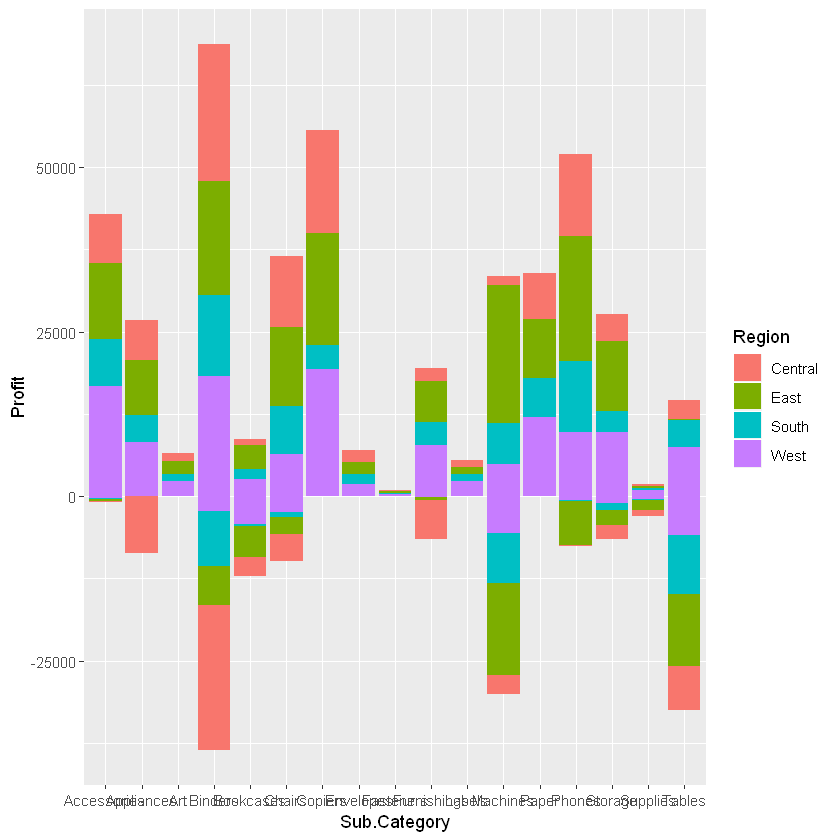

In [23]:
#Let us see if this is the case with other segments

ggplot() + geom_bar(data = mydatanew, aes(x = Sub.Category, y = Profit, fill = Region), stat = "identity")
+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

#We see that more losses have been incurred by the Binders industry mainly in the Central region and Machines and * Tables * industry.

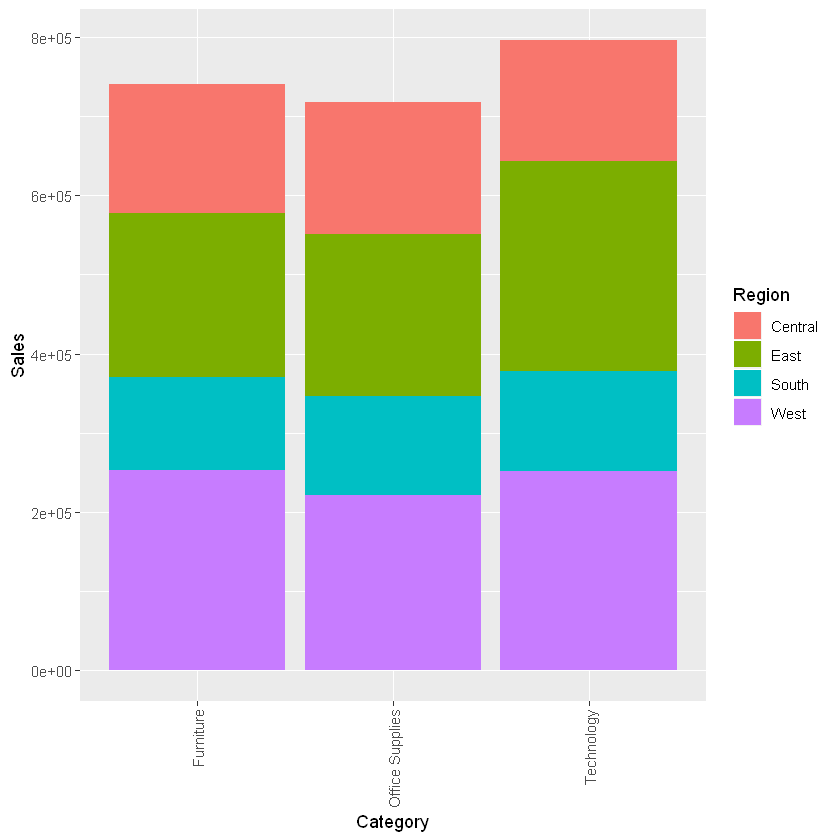

In [24]:
#Now,

ggplot() + geom_bar(data = mydatanew, aes(x = Category, y = Sales, fill = Region), stat = "identity") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


More Sales have been incurred by the technology category, then Furniture and office supplies. Mostly sales have been made from the West and East regions


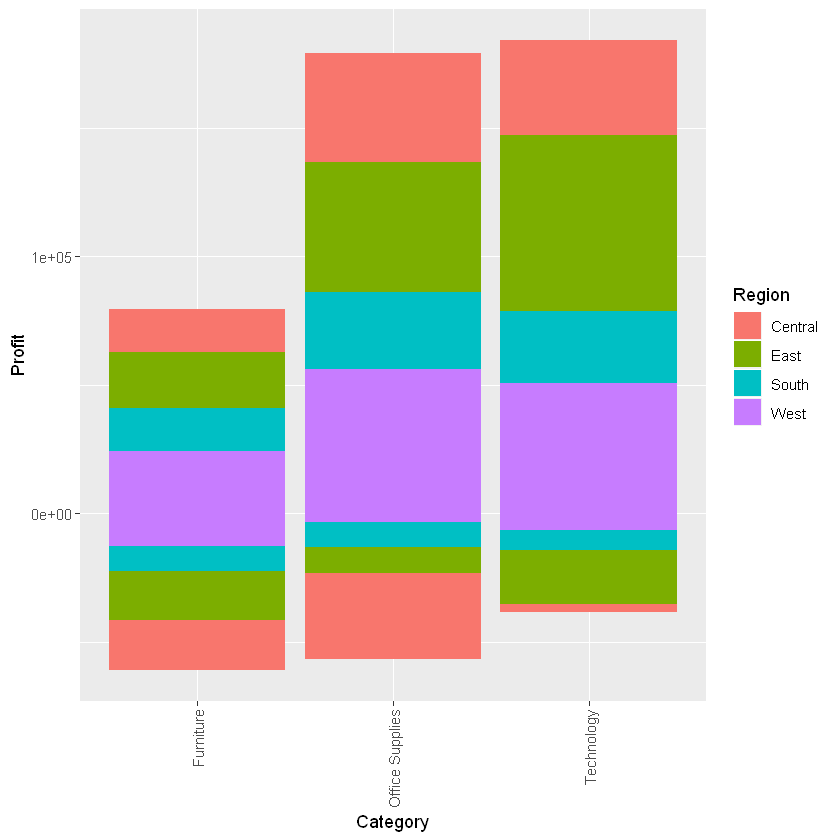

In [25]:
ggplot() + geom_bar(data = mydatanew, aes(x = Category, y = Profit, fill = Region), stat = "identity") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


The furniture category incurrs more losses than losses in the technology and Office Supplies category.
Since, Sales also vary from low to high in this category so is are profits.

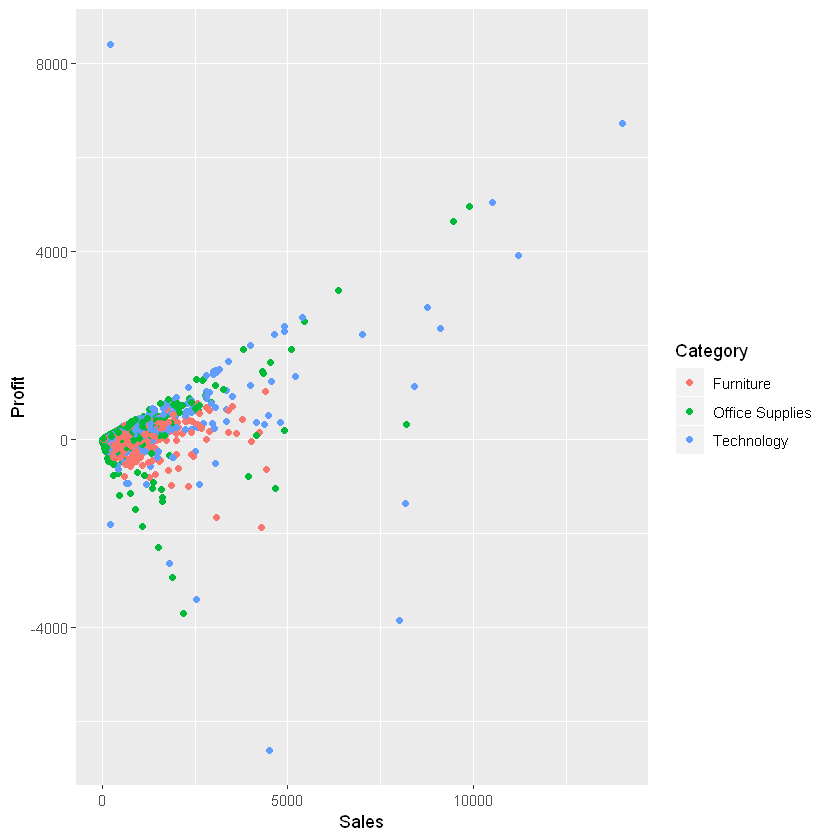

In [26]:
ggplot() + geom_point(data = mydatanew, aes(x = Sales, y = Profit, color = Category)) 


# We have now witnessed from the above graphs that the Sales to Profit ratio is same in every category, 
# no matter how they are clubbed.


# Recommended Solutions/ Key Insights
# Same day shipment if receives more discounts can trigger sales/profits. Discounts should be based on the
# Sales and should not increase a particular range otherwise unnecessary disounts with
# low sales can witness huge losses Binders and 
# Machines industry should be focused upon more so as to strengthen these weakened industry areas. Office Supplies and the Furniture industries do not seem to boom in the Central Region

## COMPLETED